In [1]:
import pathlib
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from rampds.fe_utils.utils import FileUtils
from rampds.fe_utils.openfe_utils import compare_plots, compare_execution_times

/mnt/data/cleger/miniconda3/envs/clean_autods/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-10-17 08:51:21,603	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2025-10-17 08:51:21,726	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


# v6

- Test single vs 4 blend lgbm vs lgbm + catboost + xgboost blend (15 CV folds each)

In [2]:
datasets = [
    "concrete_strength",
    "rainfall", 
    "wine_quality",
    "employee_attrition",
    "blueberry_yield",
    "heat_flux",
    "abalone",
    "mohs_hardness", 
    "crab_age",
    "housing_price_california",
    "influencer",
    "cirrhosis_outcomes",
    "sticker_sales",
    "reservation_cancellation",
    "obesity_risk",
    "loan_approval",
    "calorie_expenditure",
    "credit_fusion",
    "bank_churn",
    "failure",
    "unknown_a",
    # "horse_survival", 
    # "media_cost",
    # "smoking",
    # "mercedes_testing_time",
    # "insurance_claim",
    # "synthanic",
    # "mental_health",
    # "flood_probability",
    # "insurance_premium",
    # "covertype",
    # "loan_loss",
]

In [3]:
def get_base_paths(data_name, versions_list):
    kaggle_name = f"kaggle_{data_name}"
    base_path = pathlib.Path("../openfe_experiments")

    paths = [base_path / f"openfe_{kaggle_name}_10k_mcf_2_db_fb_False_grid_search_{version}" / kaggle_name for version in versions_list]
    return paths

In [4]:
def get_both_plots(path_list):
    plots_file = "openfe_scores_plot.png"
    plots_path = [str(path / plots_file) for path in path_list]

    return plots_path

def get_both_metadata(path_list):
    metadata_file = "experiment_metadata.json"
    metadata_path = [path / metadata_file for path in path_list]
    metadata_list = [FileUtils.load_json(path) for path in metadata_path]

    return metadata_list



Comparing plots for dataset: concrete_strength


## OpenFE concrete_strength - objective direction: minimize

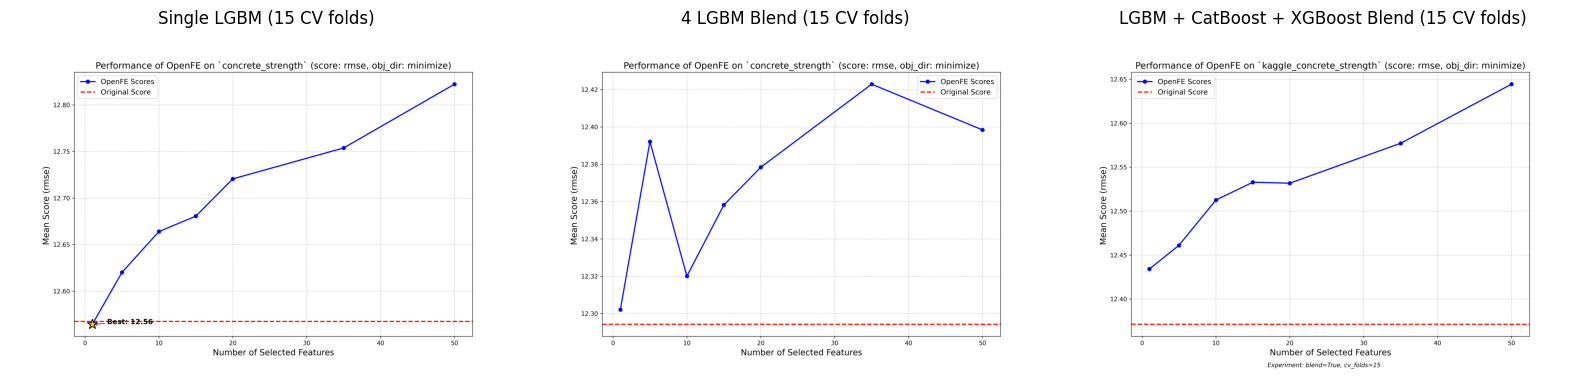

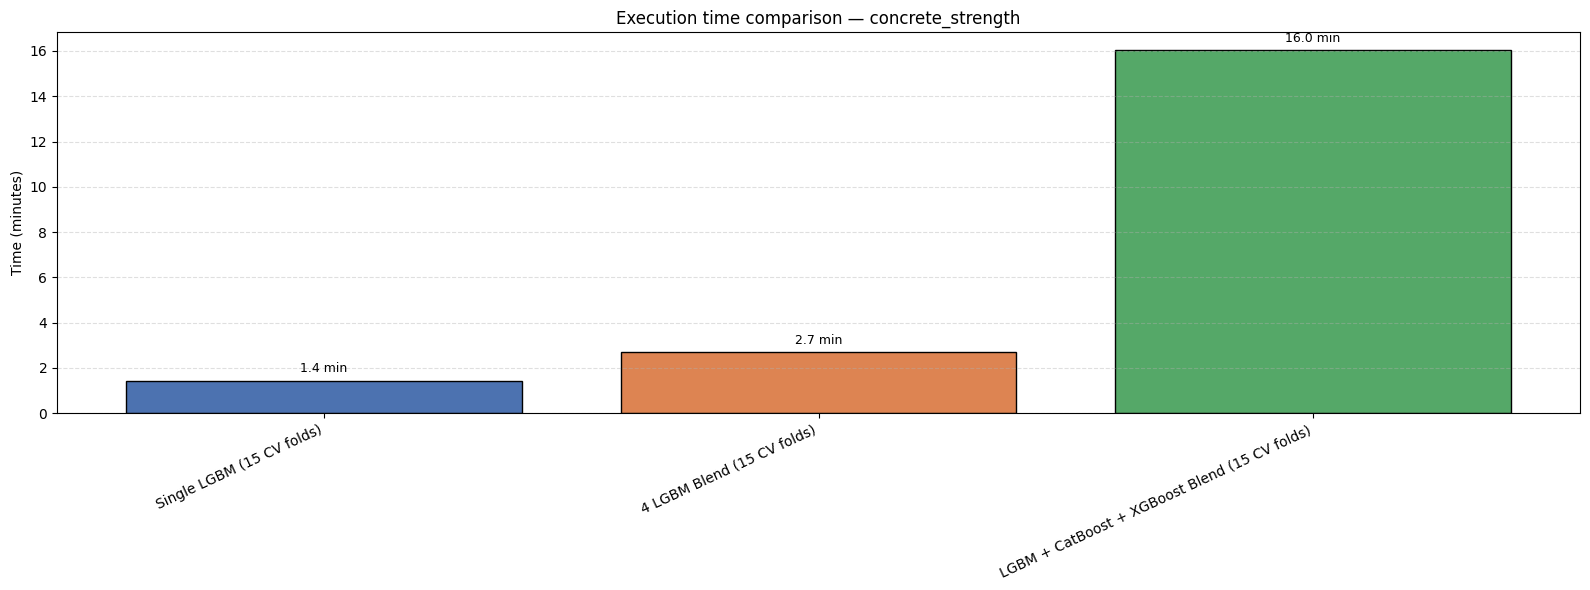



Comparing plots for dataset: rainfall


## OpenFE rainfall - objective direction: maximize

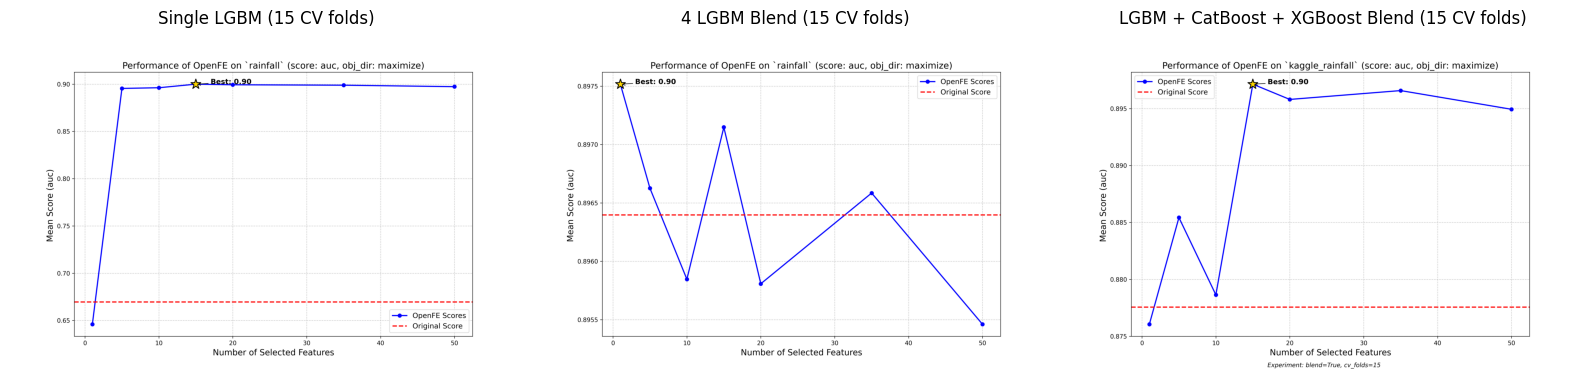

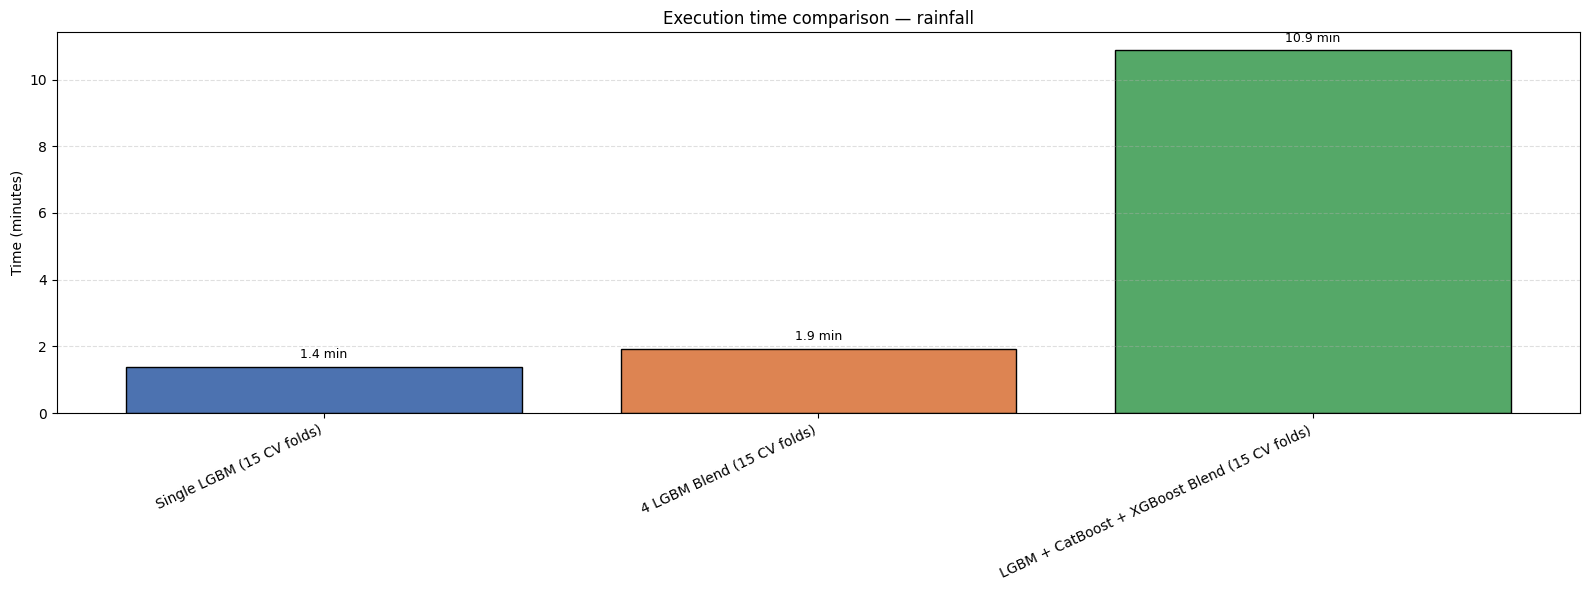



Comparing plots for dataset: wine_quality


## OpenFE wine_quality - objective direction: maximize

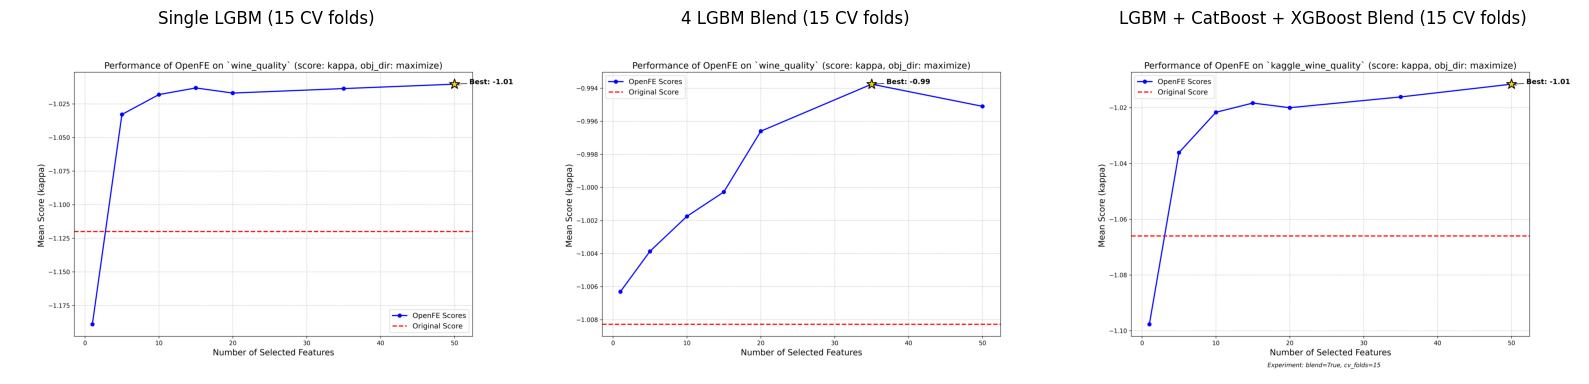

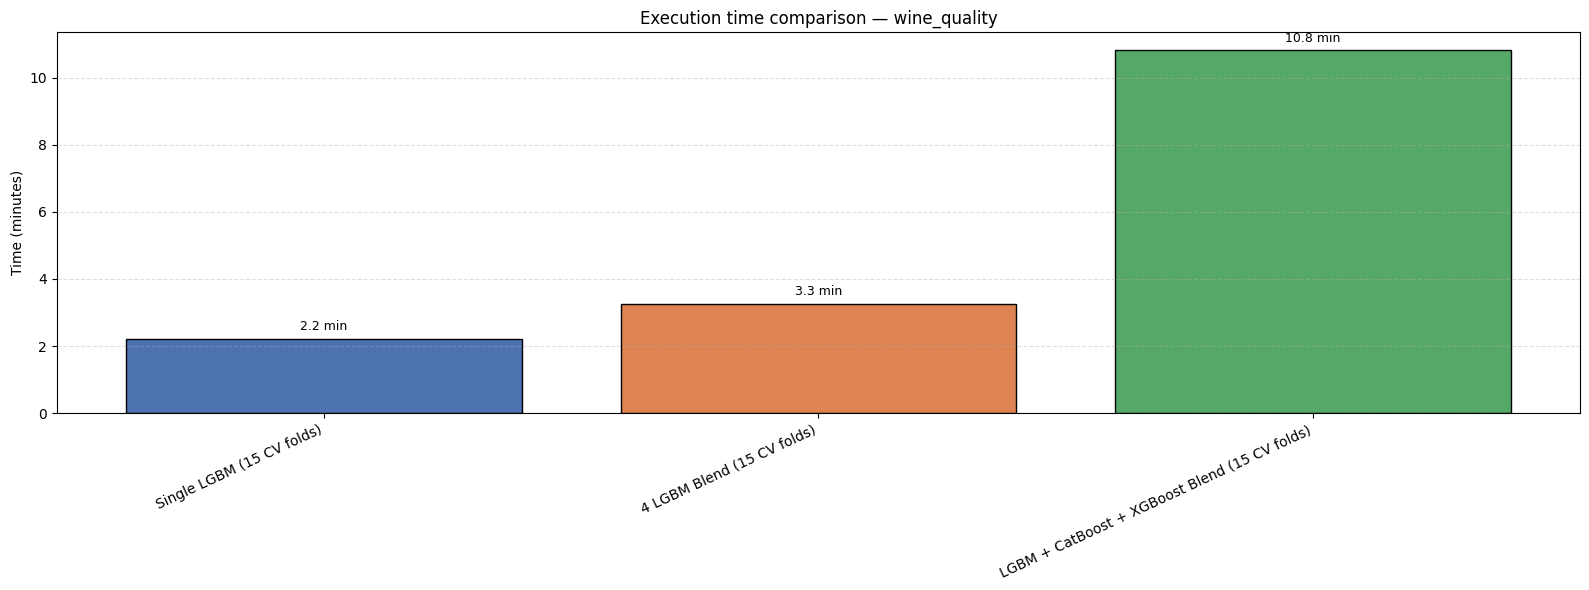



Comparing plots for dataset: employee_attrition


## OpenFE employee_attrition - objective direction: maximize

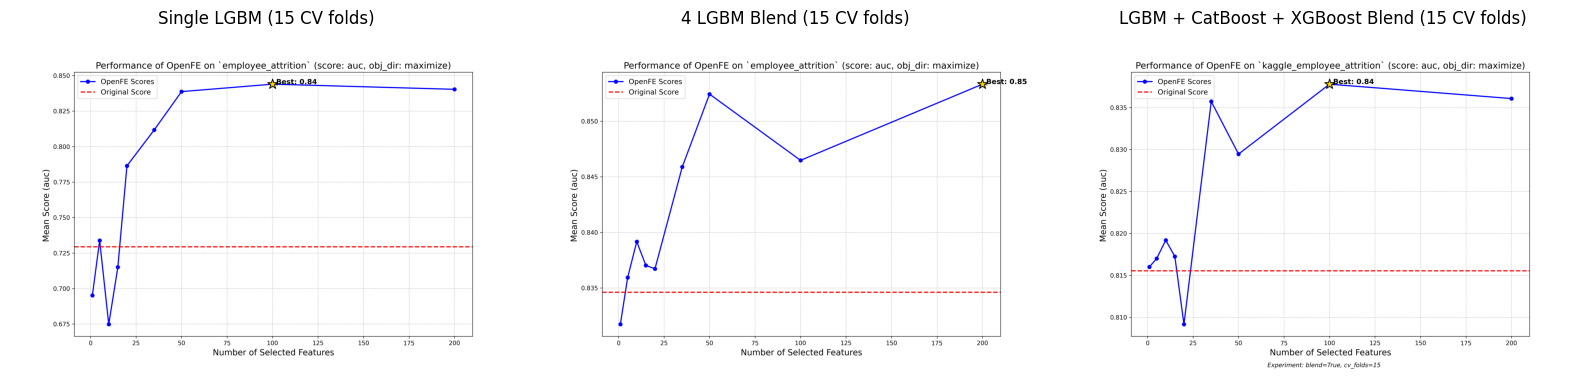

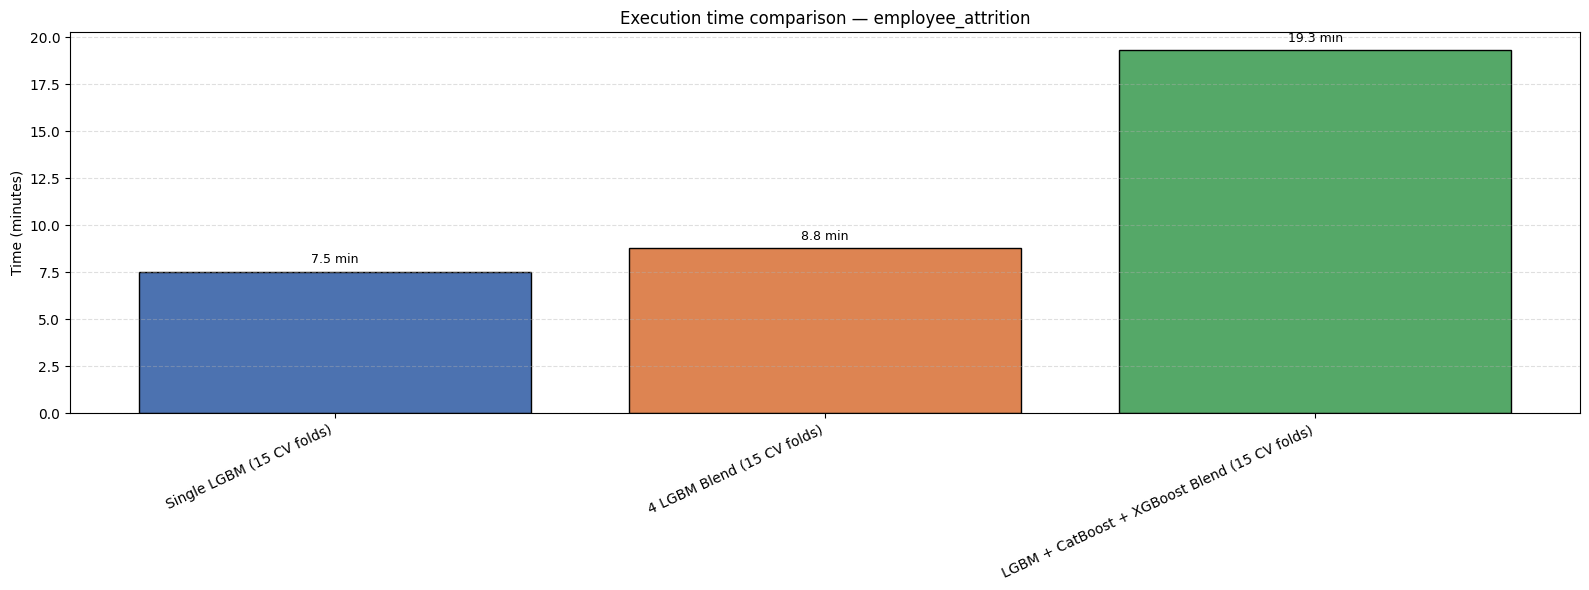



Comparing plots for dataset: blueberry_yield


## OpenFE blueberry_yield - objective direction: minimize

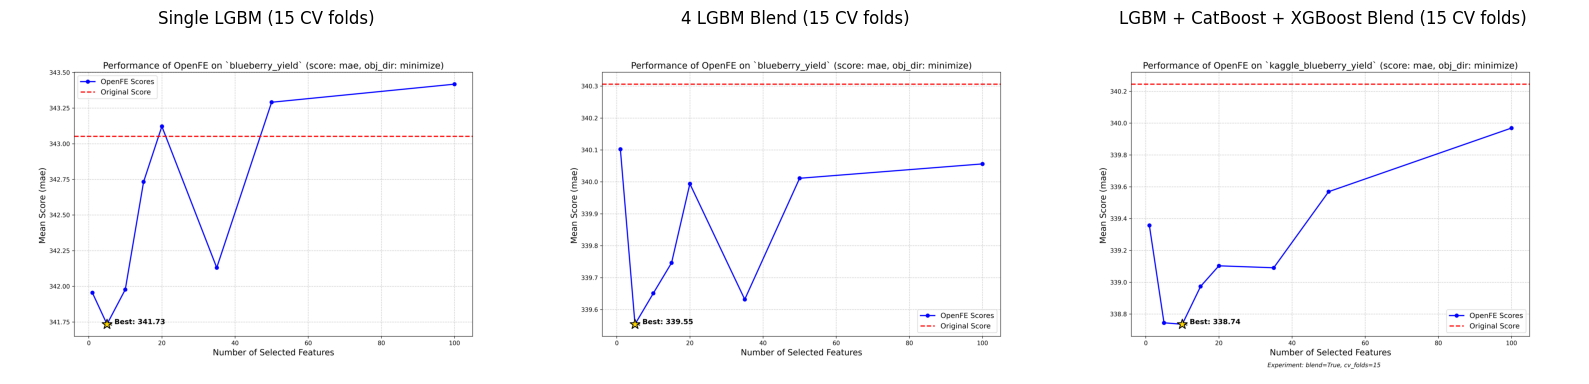

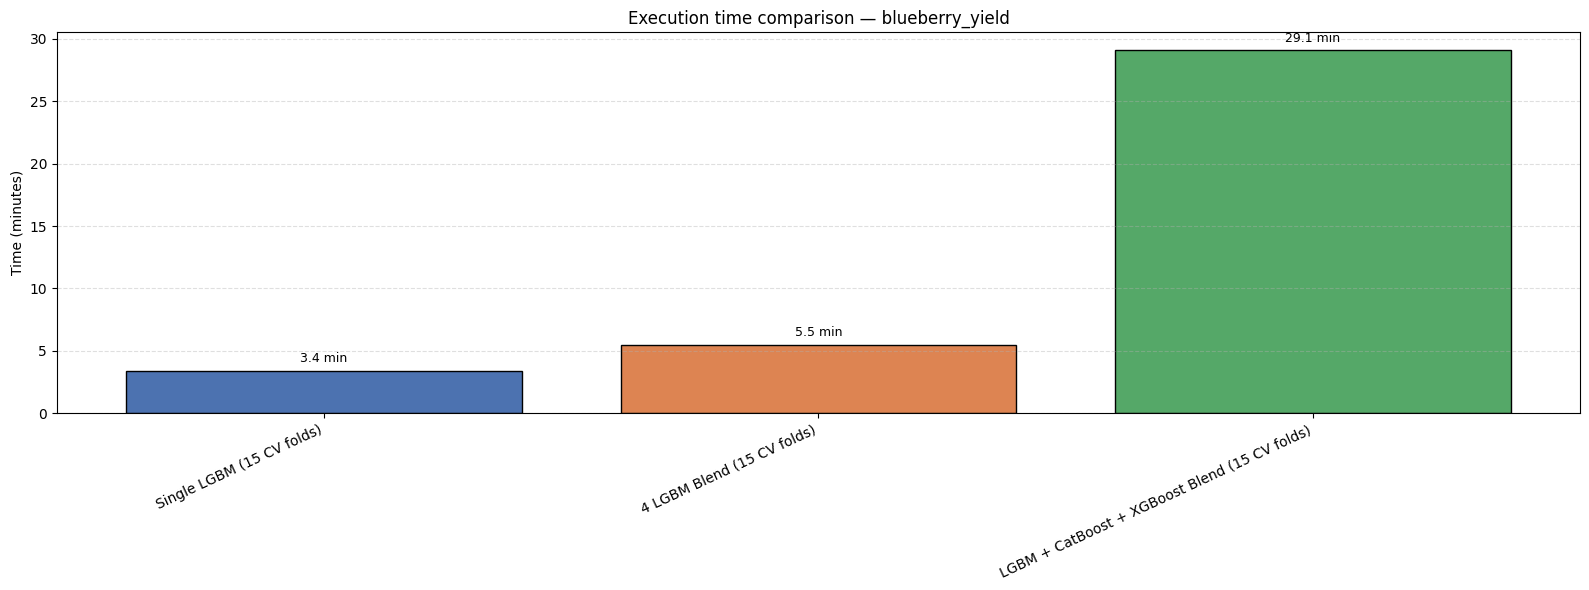



Comparing plots for dataset: heat_flux


## OpenFE heat_flux - objective direction: minimize

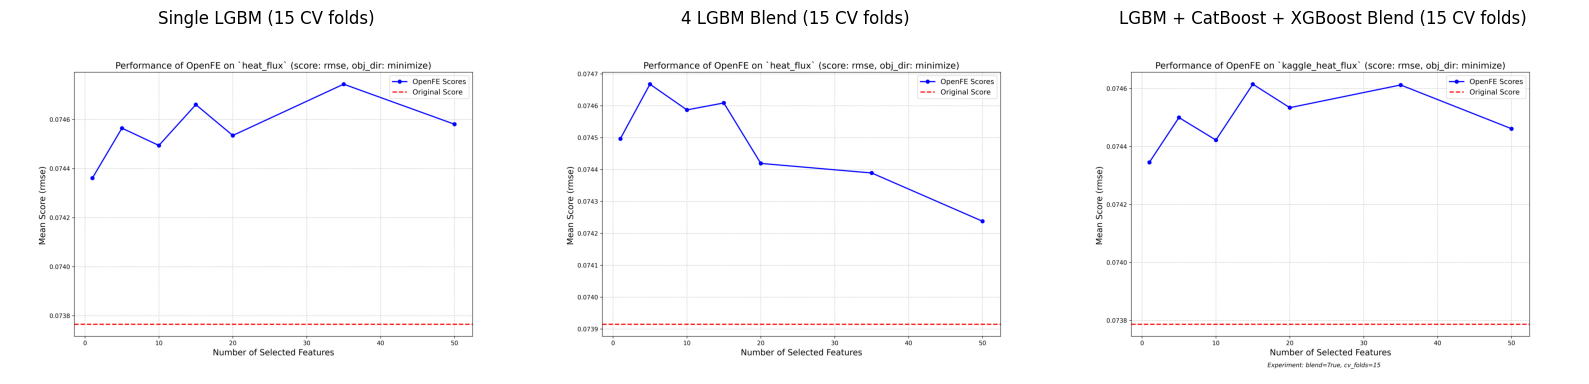

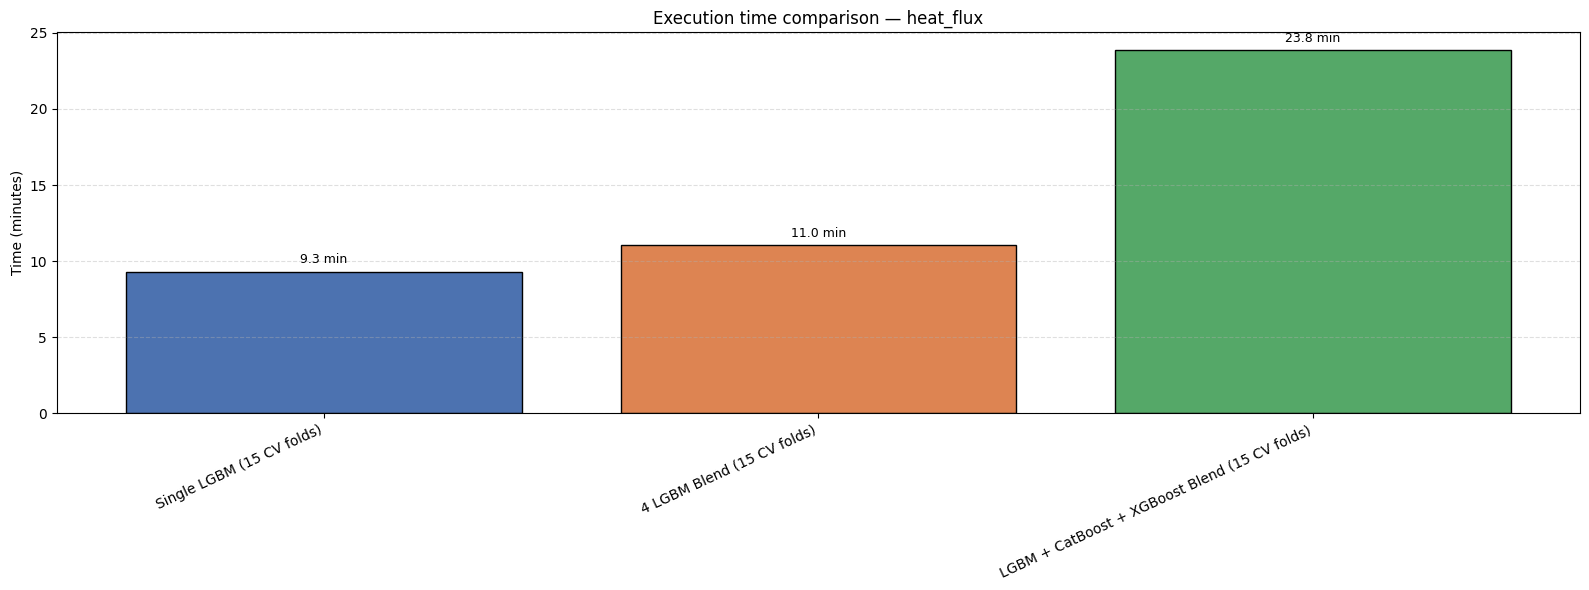



Comparing plots for dataset: abalone


## OpenFE abalone - objective direction: minimize

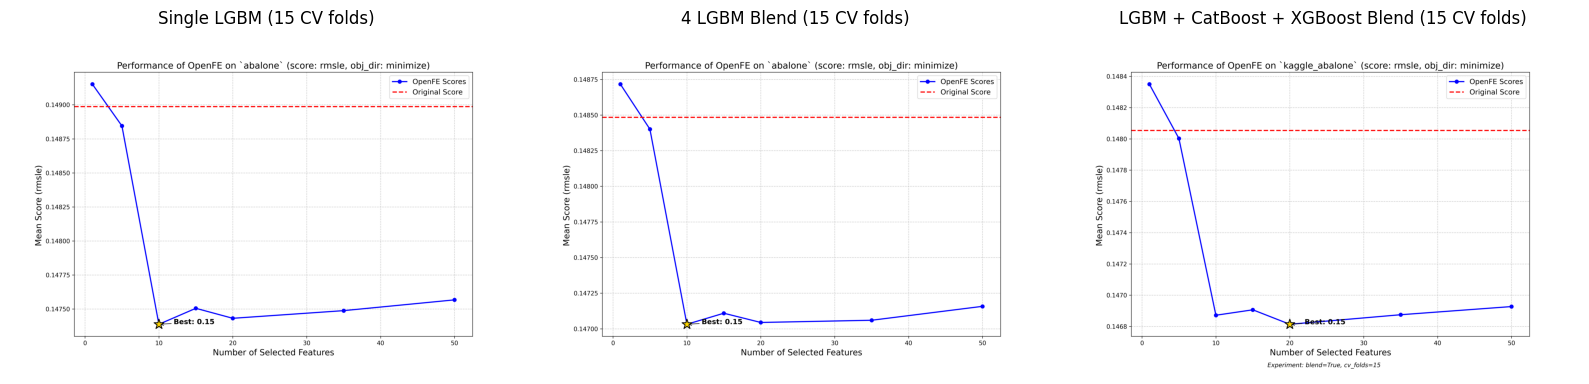

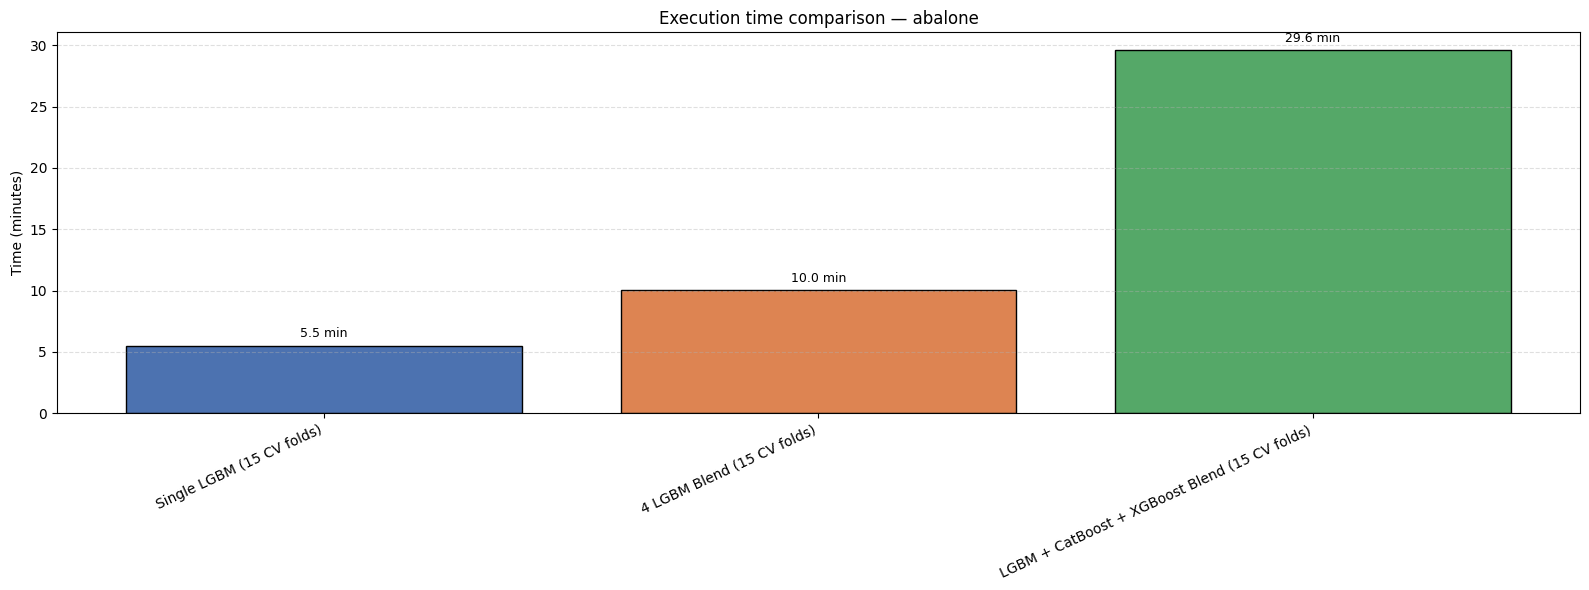



Comparing plots for dataset: mohs_hardness


## OpenFE mohs_hardness - objective direction: minimize

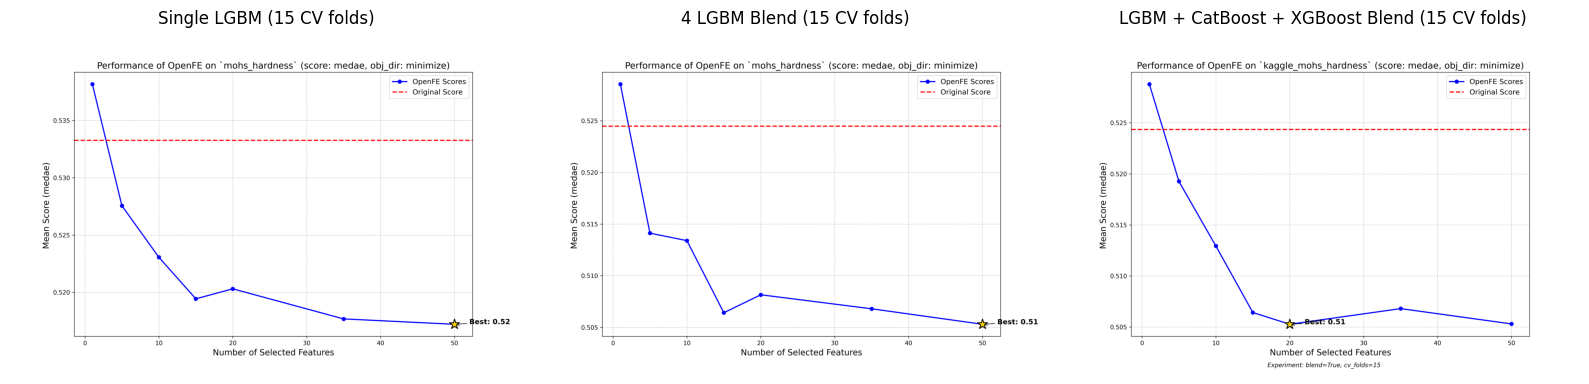

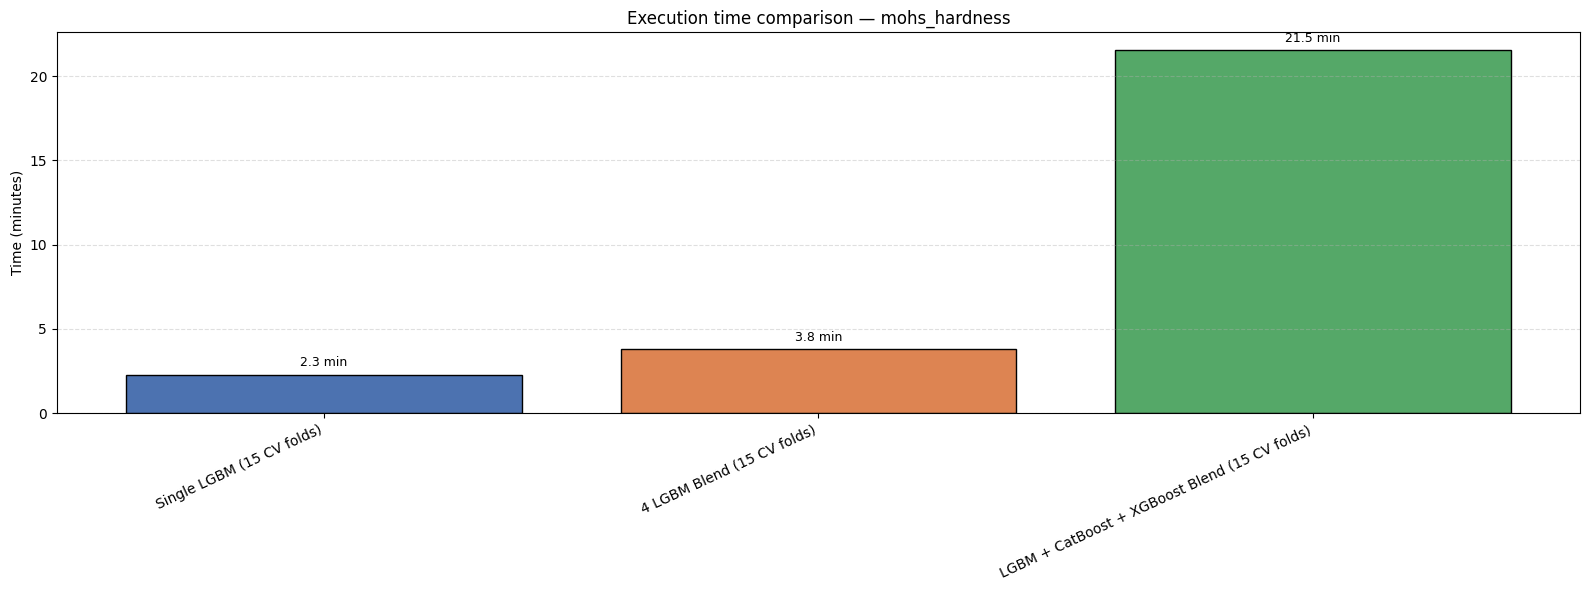



Comparing plots for dataset: crab_age


## OpenFE crab_age - objective direction: minimize

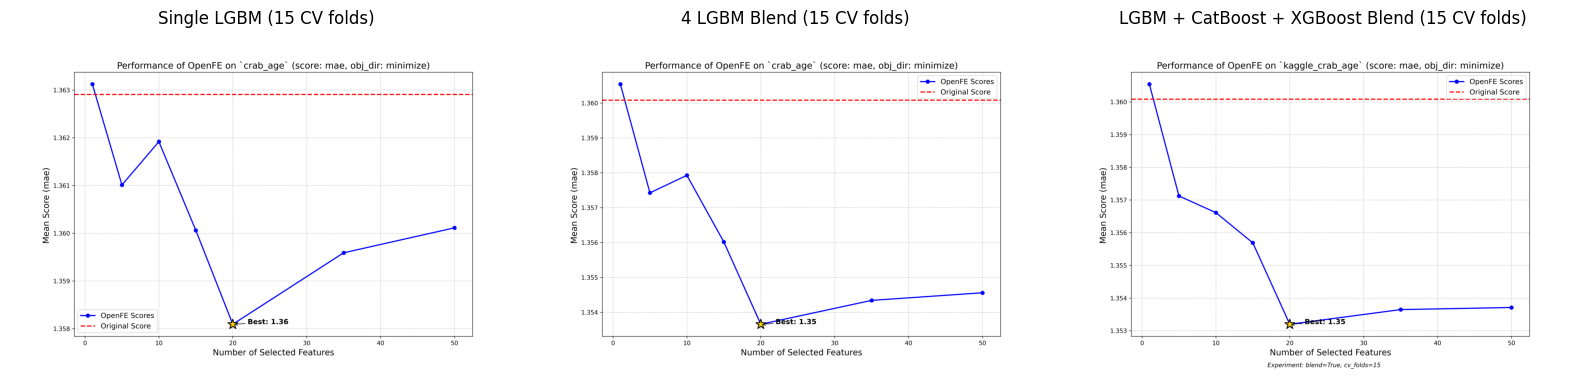

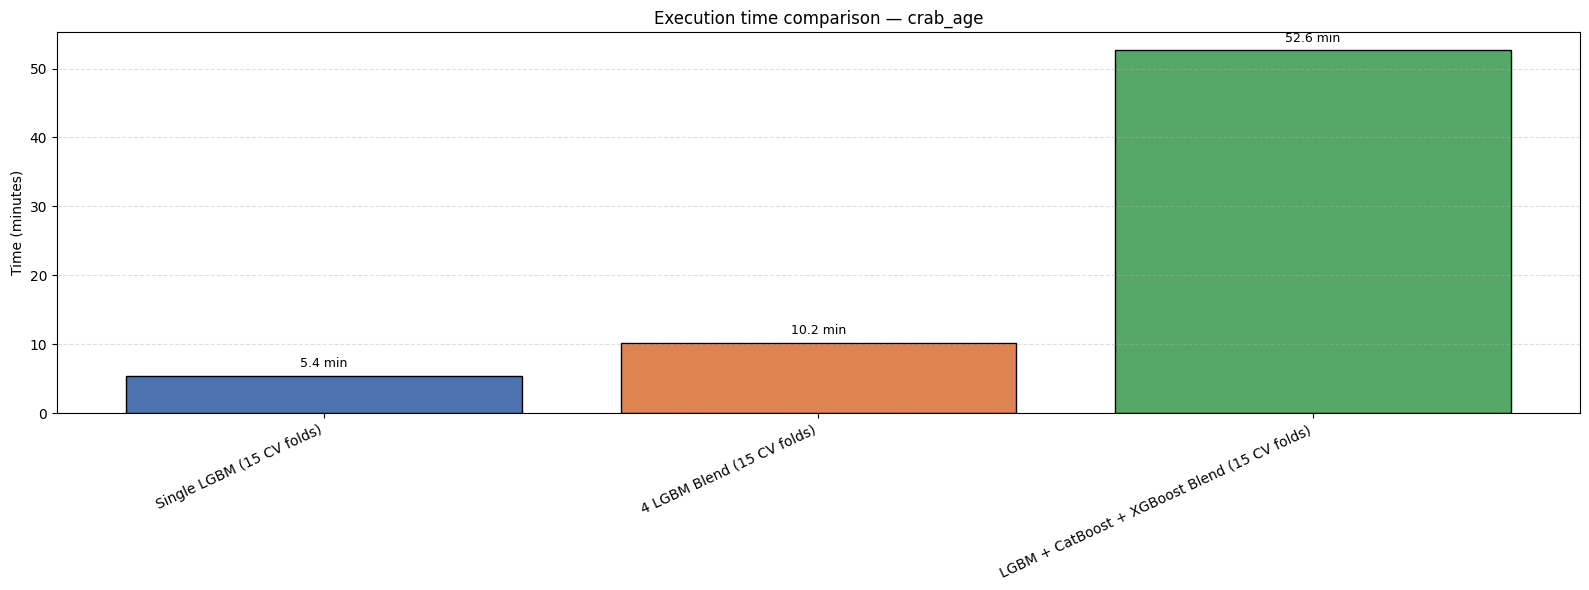



Comparing plots for dataset: housing_price_california


## OpenFE housing_price_california - objective direction: minimize

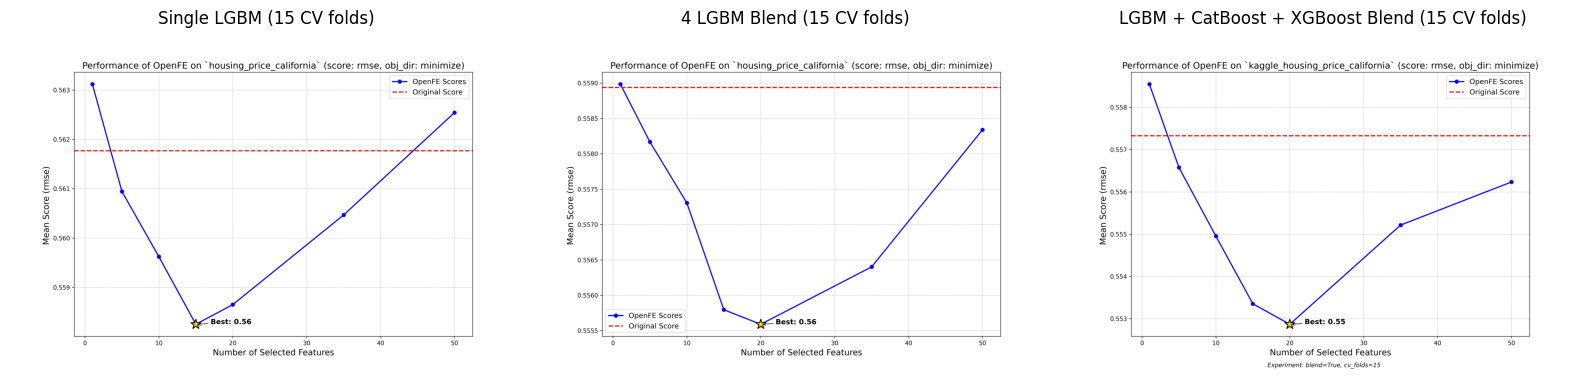

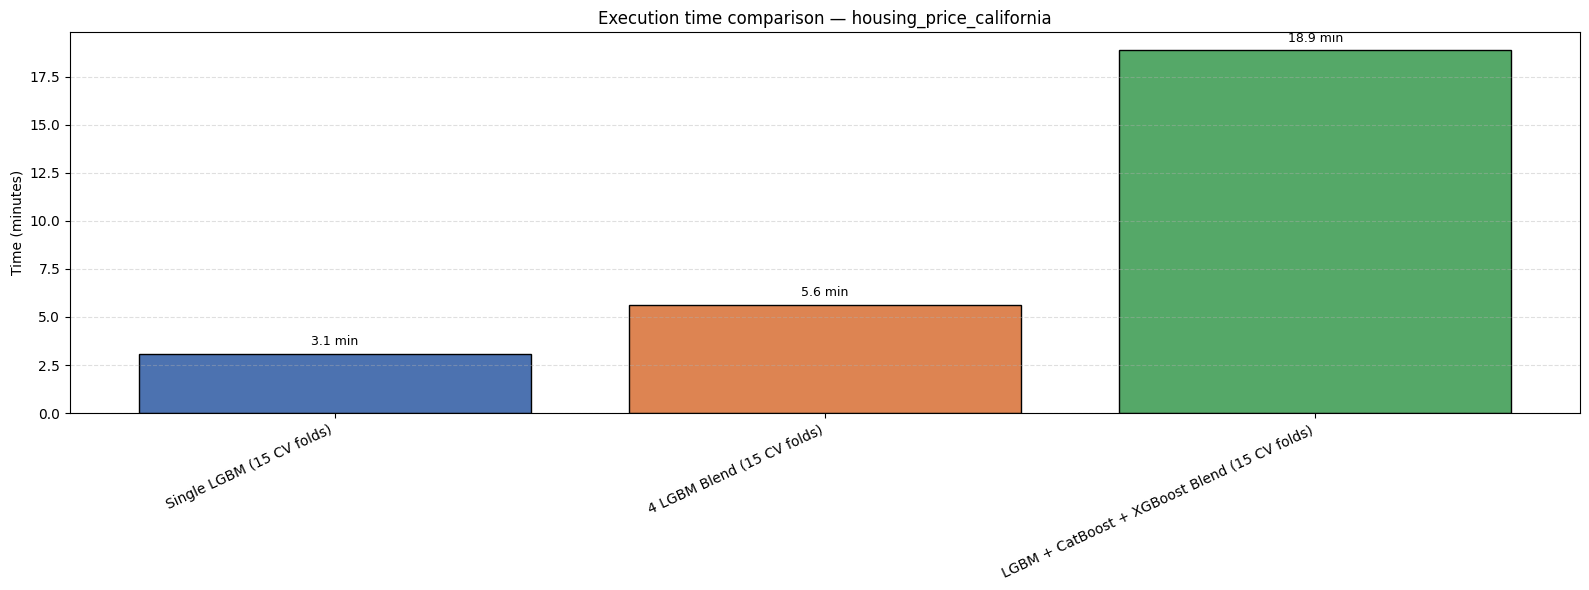



Comparing plots for dataset: influencer


## OpenFE influencer - objective direction: maximize

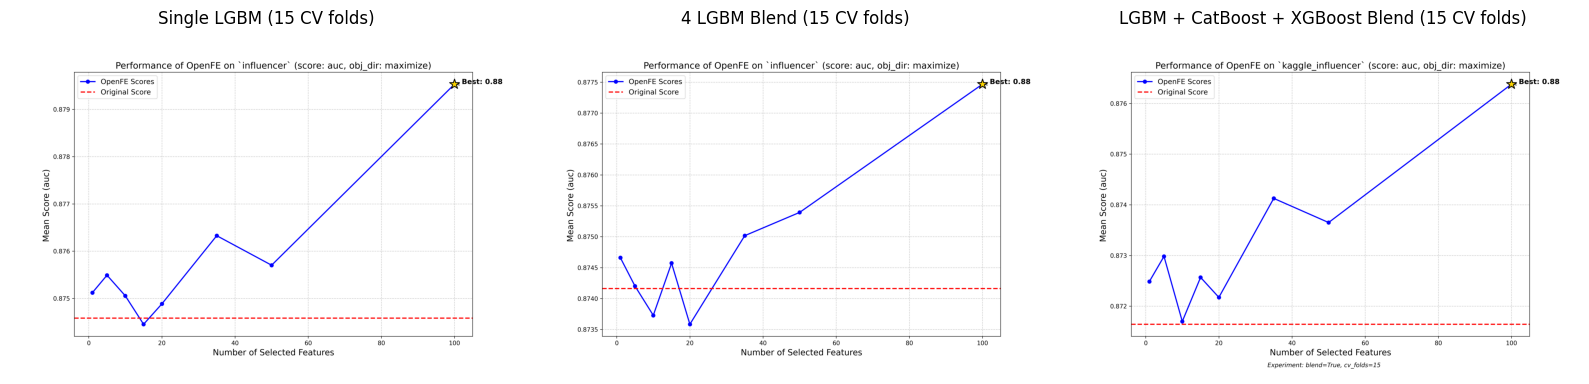

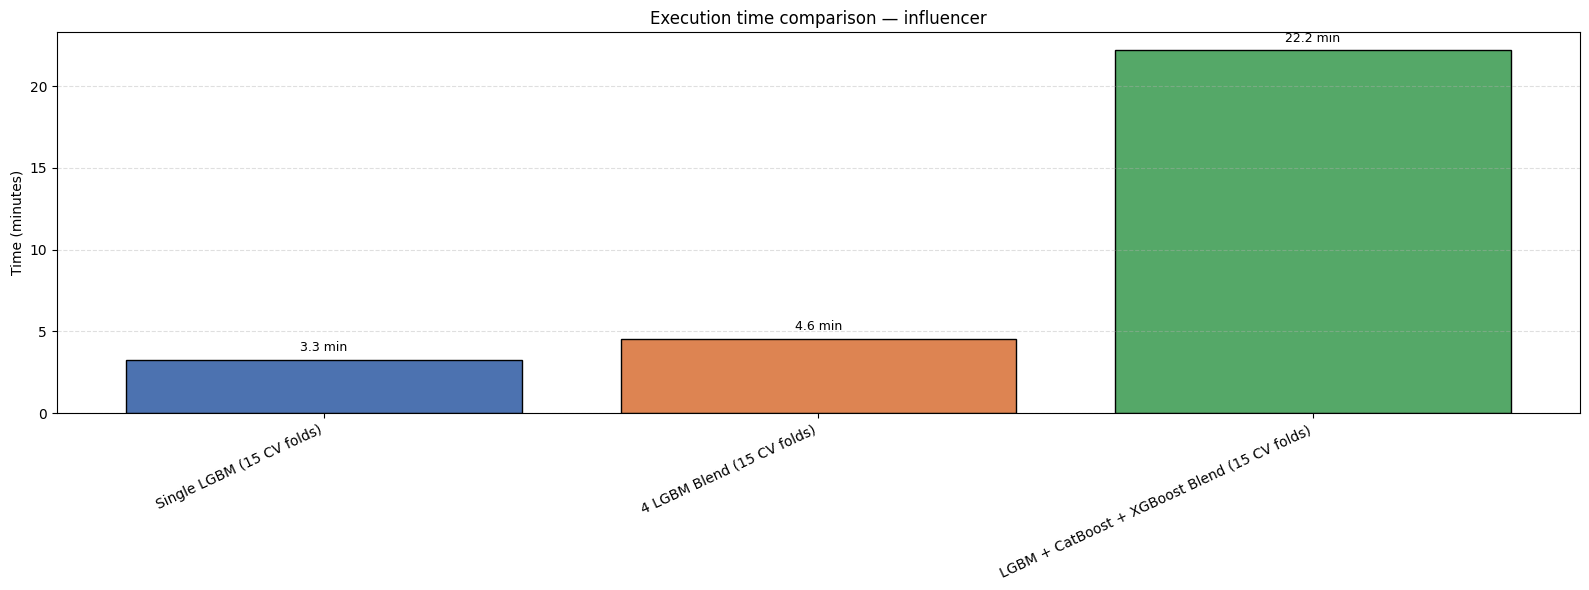



Comparing plots for dataset: cirrhosis_outcomes


## OpenFE cirrhosis_outcomes - objective direction: minimize

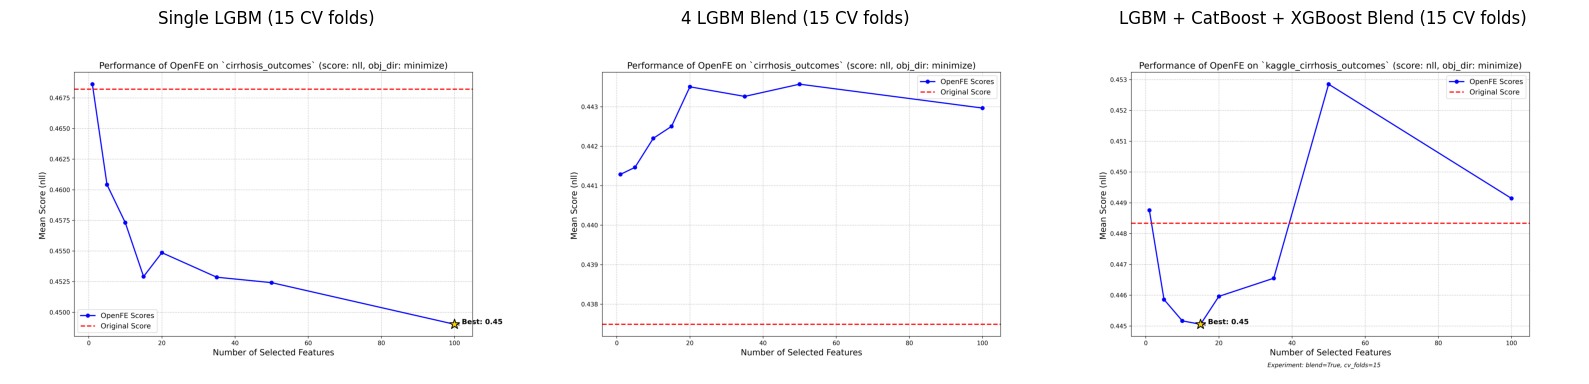

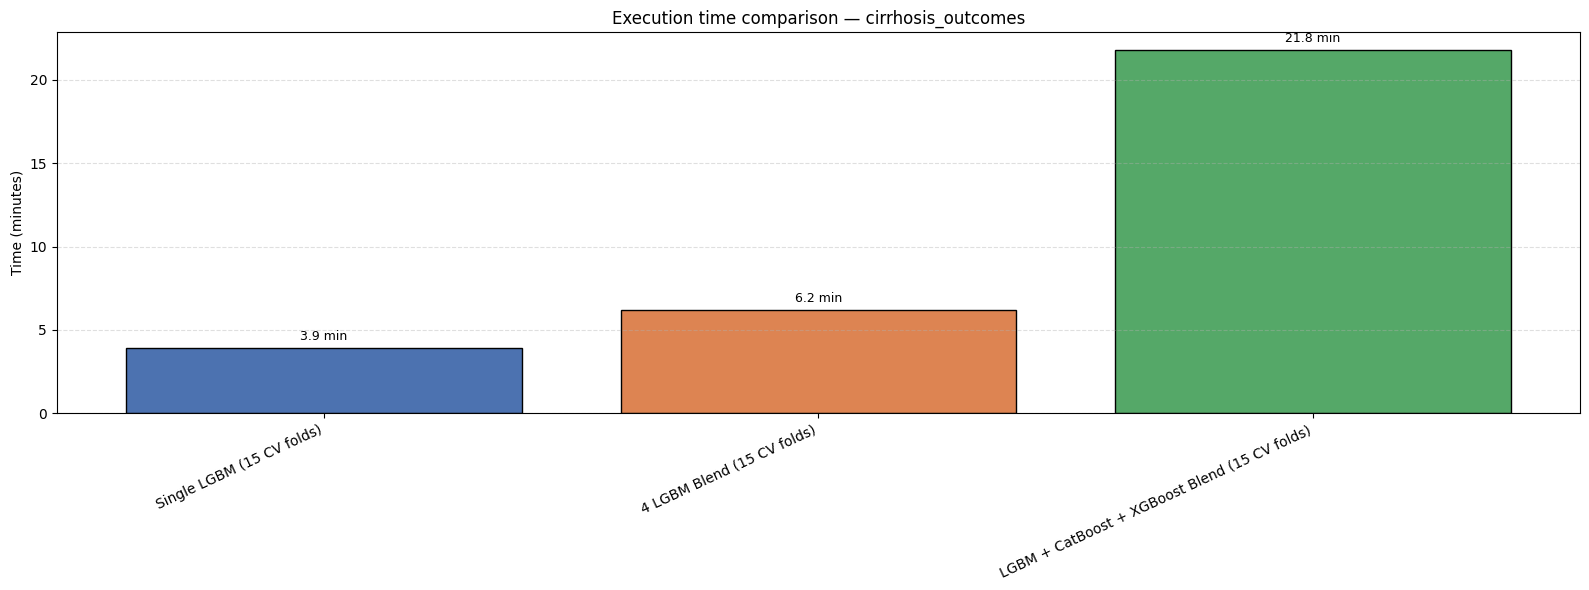



Comparing plots for dataset: sticker_sales
An error occurred while processing sticker_sales: [Errno 2] No such file or directory: '../openfe_experiments/openfe_kaggle_sticker_sales_10k_mcf_2_db_fb_False_grid_search_v4_15_folds/kaggle_sticker_sales/experiment_metadata.json'


Comparing plots for dataset: reservation_cancellation


## OpenFE reservation_cancellation - objective direction: maximize

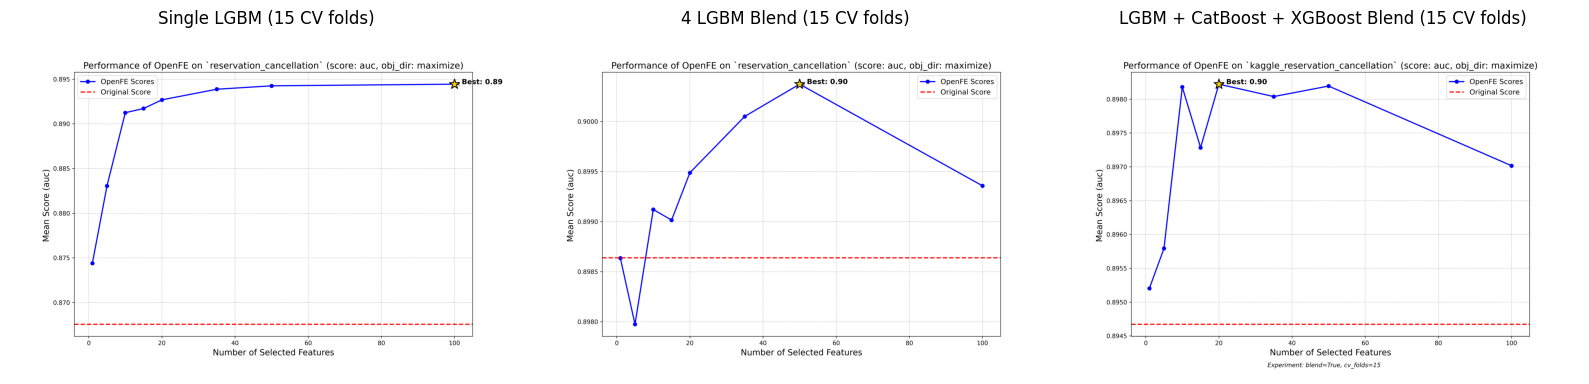

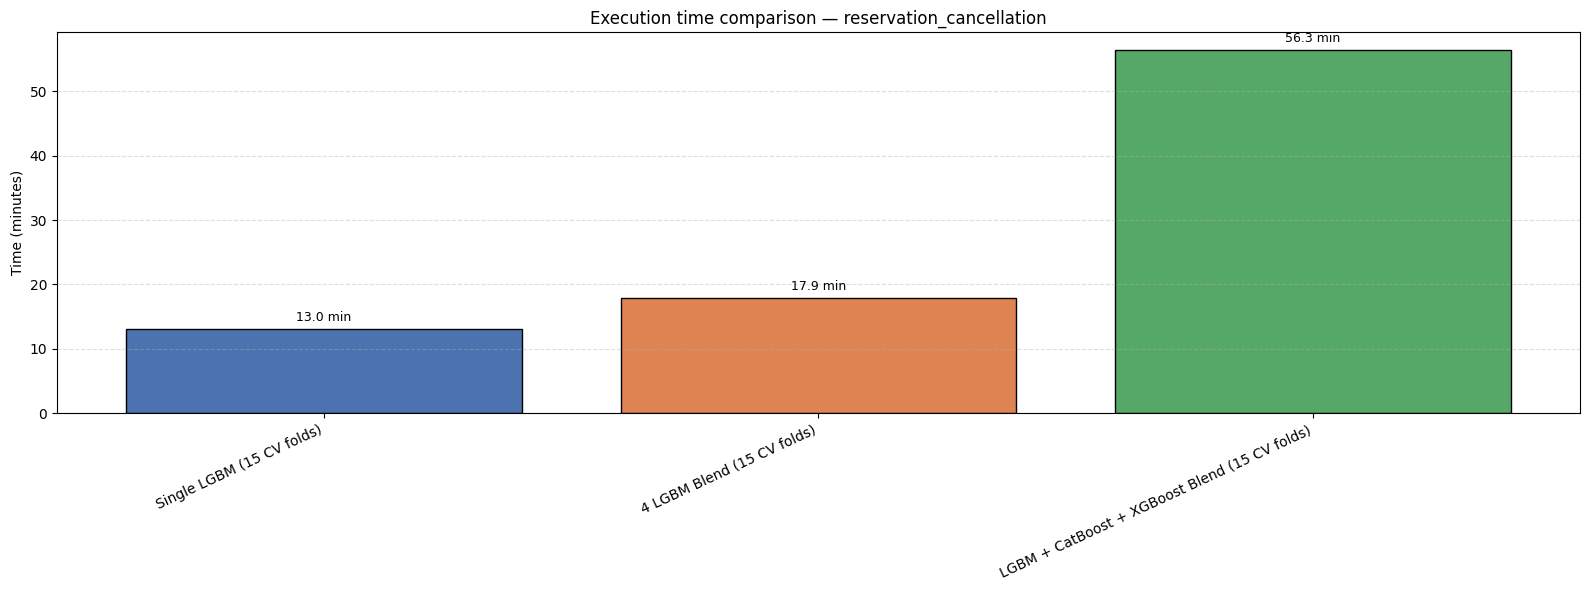



Comparing plots for dataset: obesity_risk


## OpenFE obesity_risk - objective direction: maximize

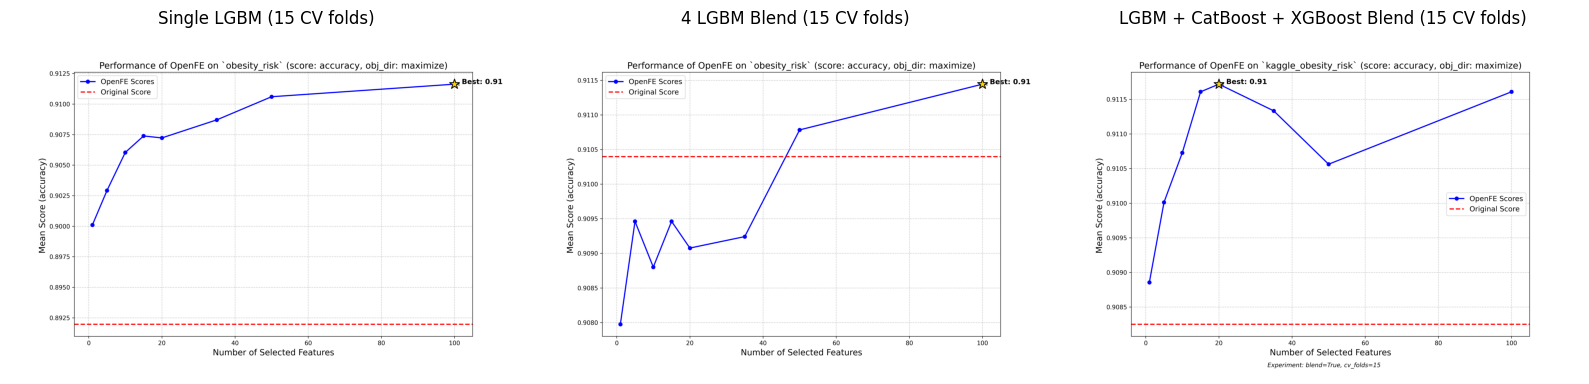

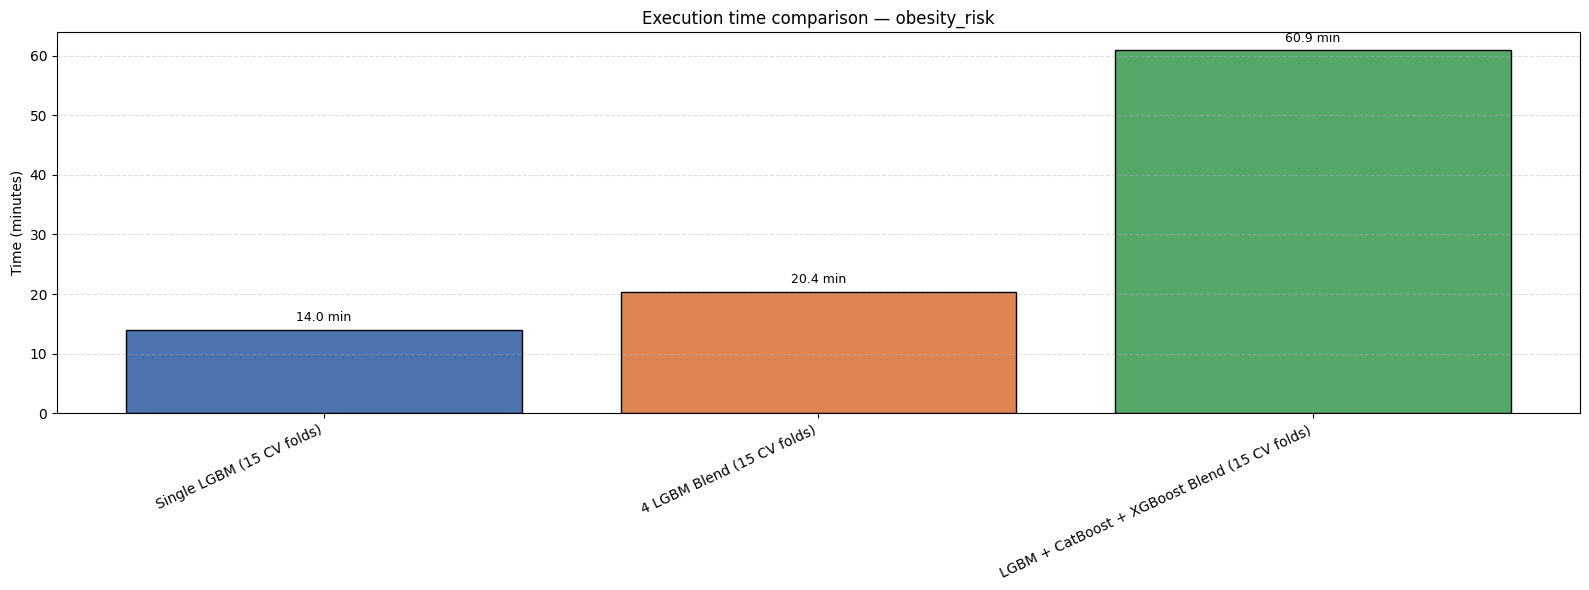



Comparing plots for dataset: loan_approval


## OpenFE loan_approval - objective direction: maximize

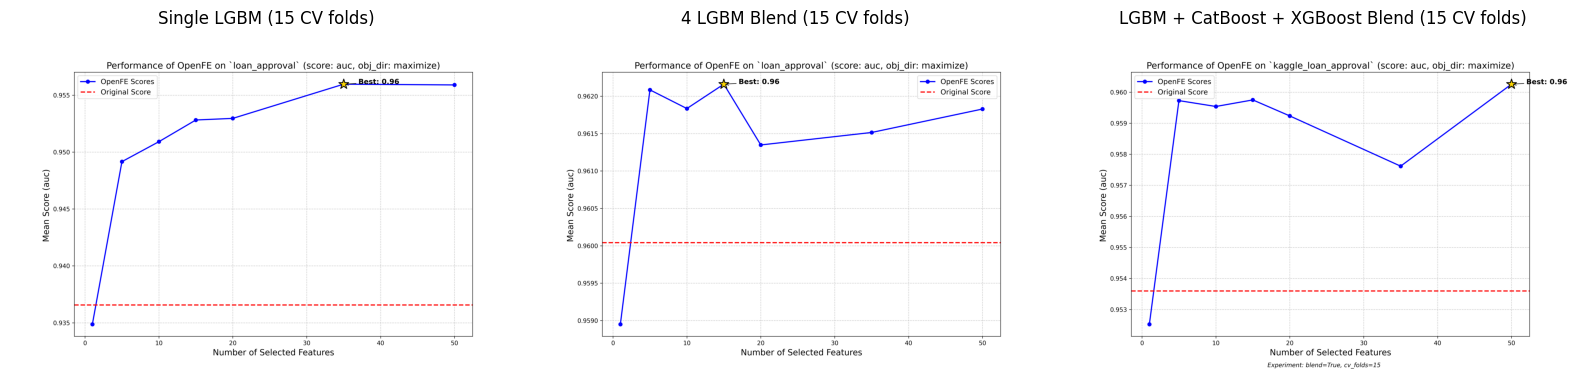

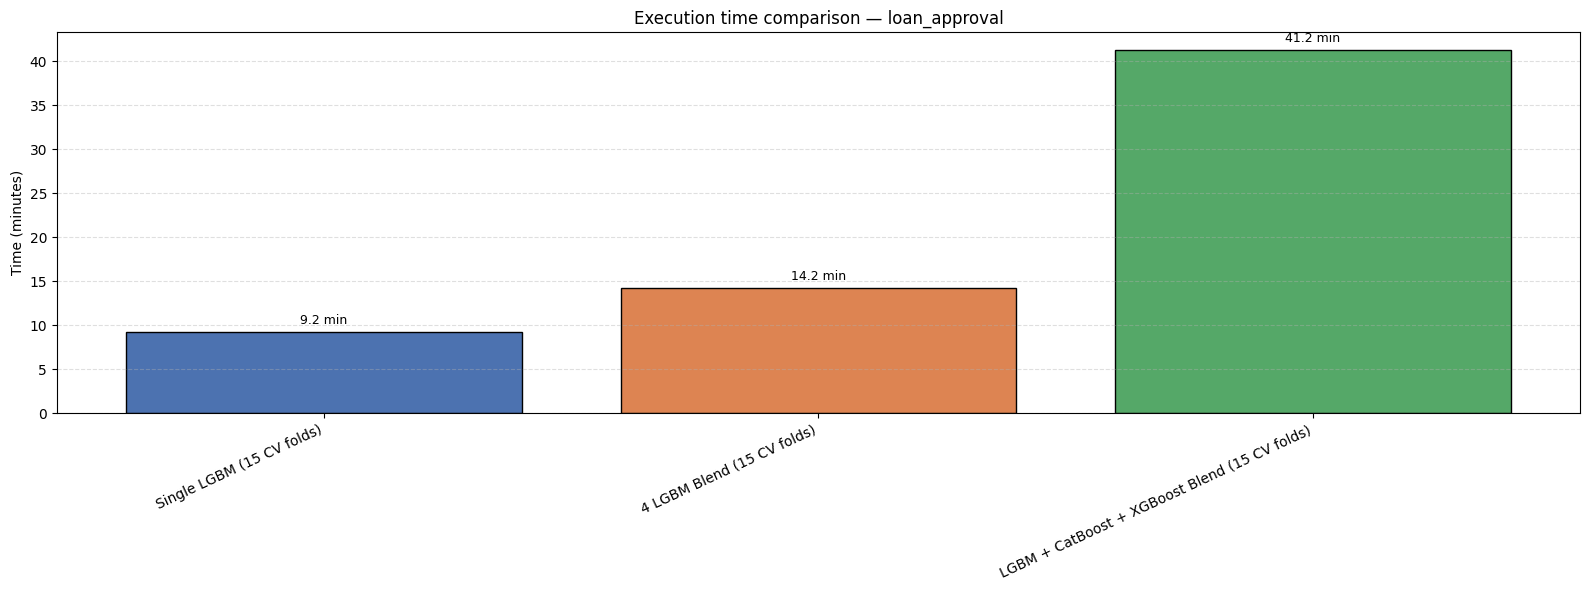



Comparing plots for dataset: calorie_expenditure


## OpenFE calorie_expenditure - objective direction: minimize

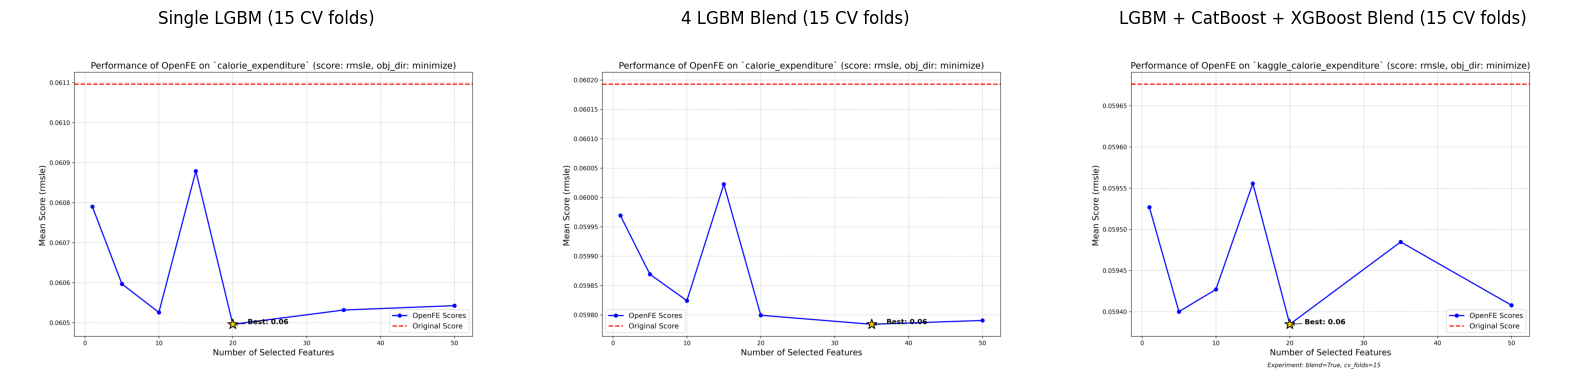

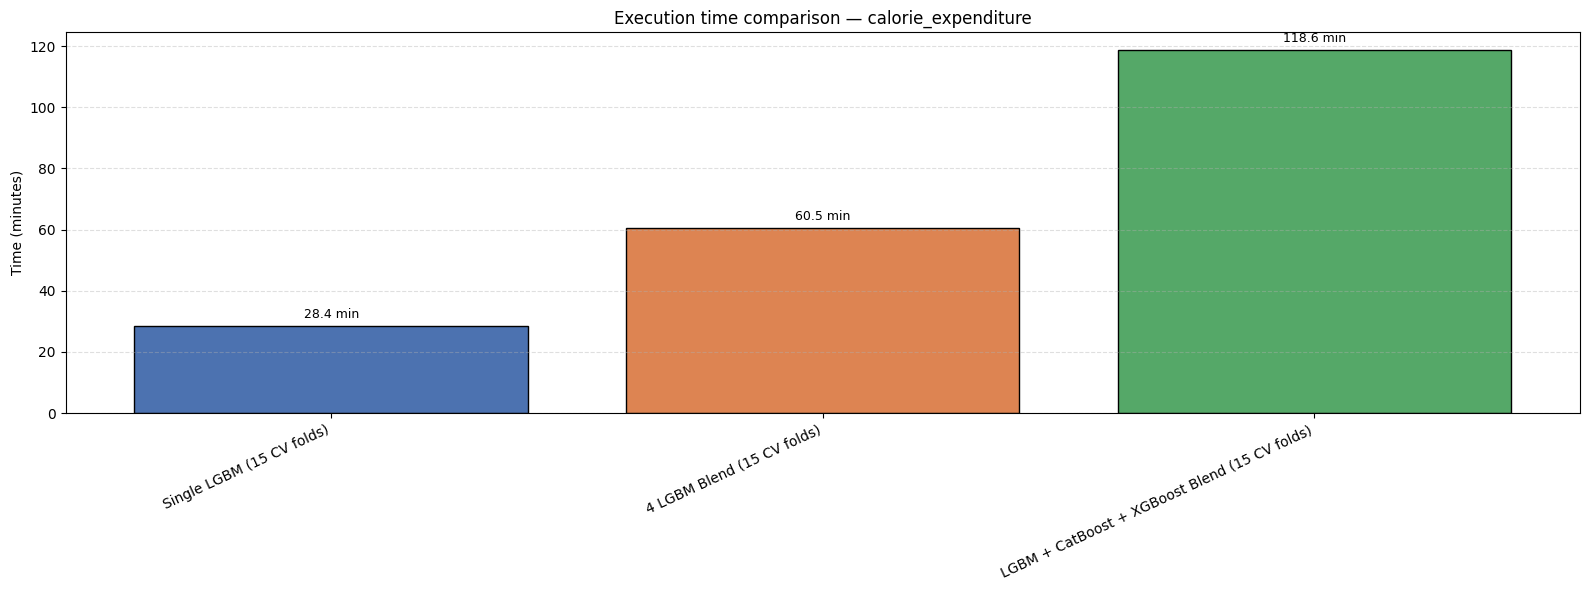



Comparing plots for dataset: credit_fusion


## OpenFE credit_fusion - objective direction: maximize

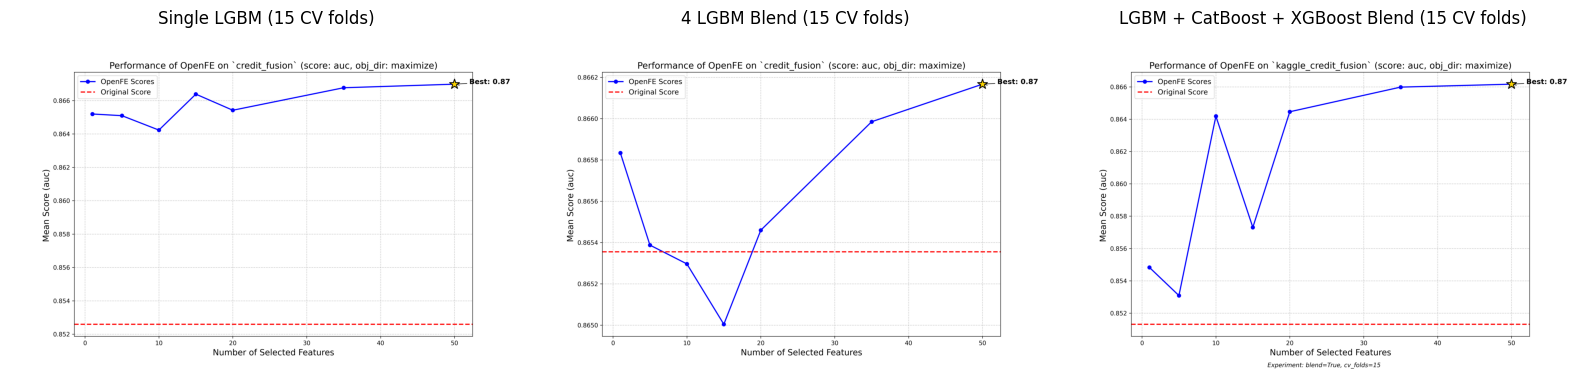

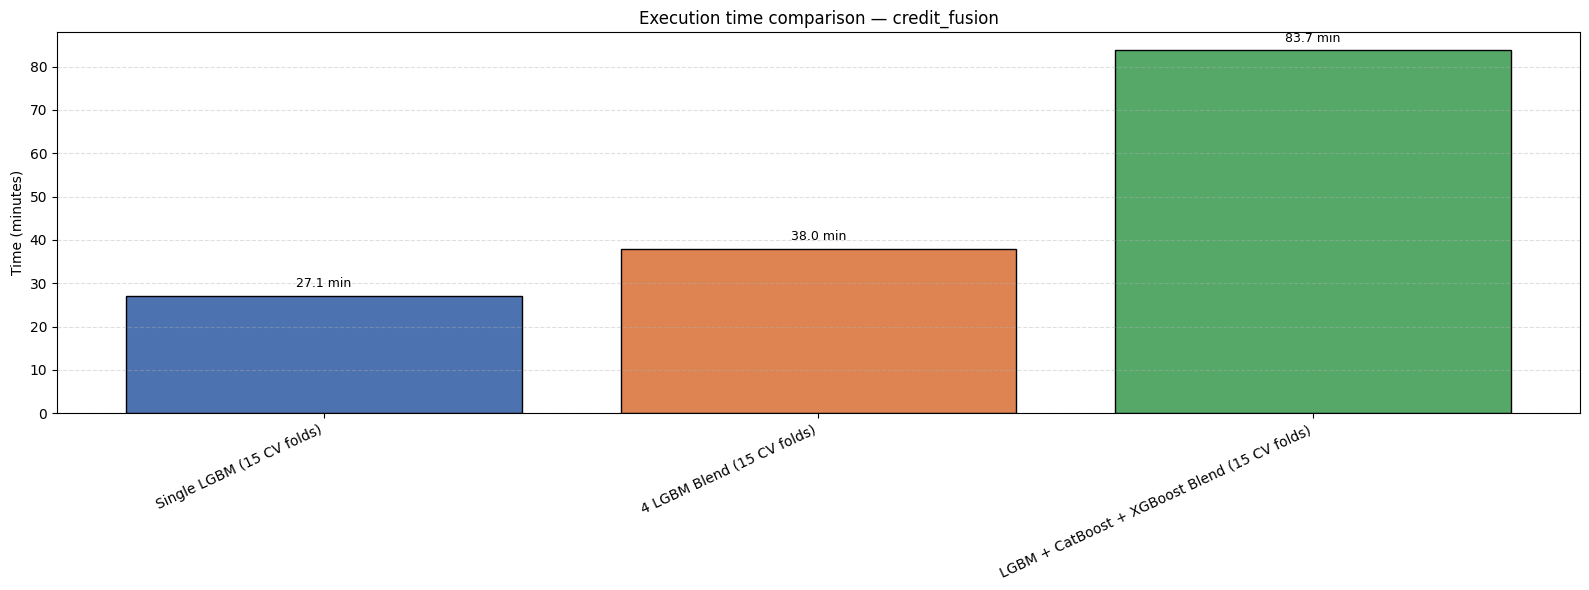



Comparing plots for dataset: bank_churn


## OpenFE bank_churn - objective direction: maximize

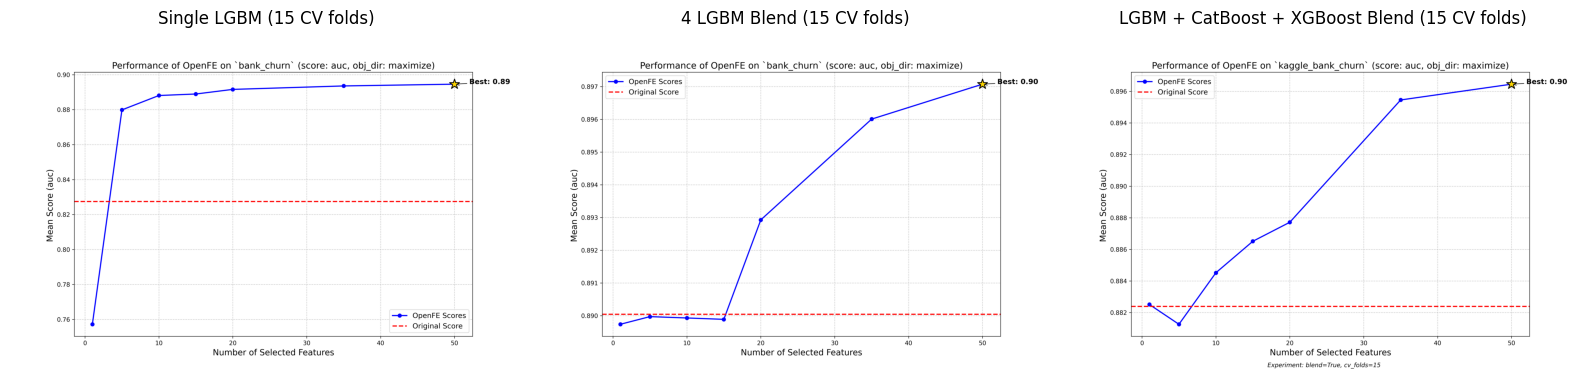

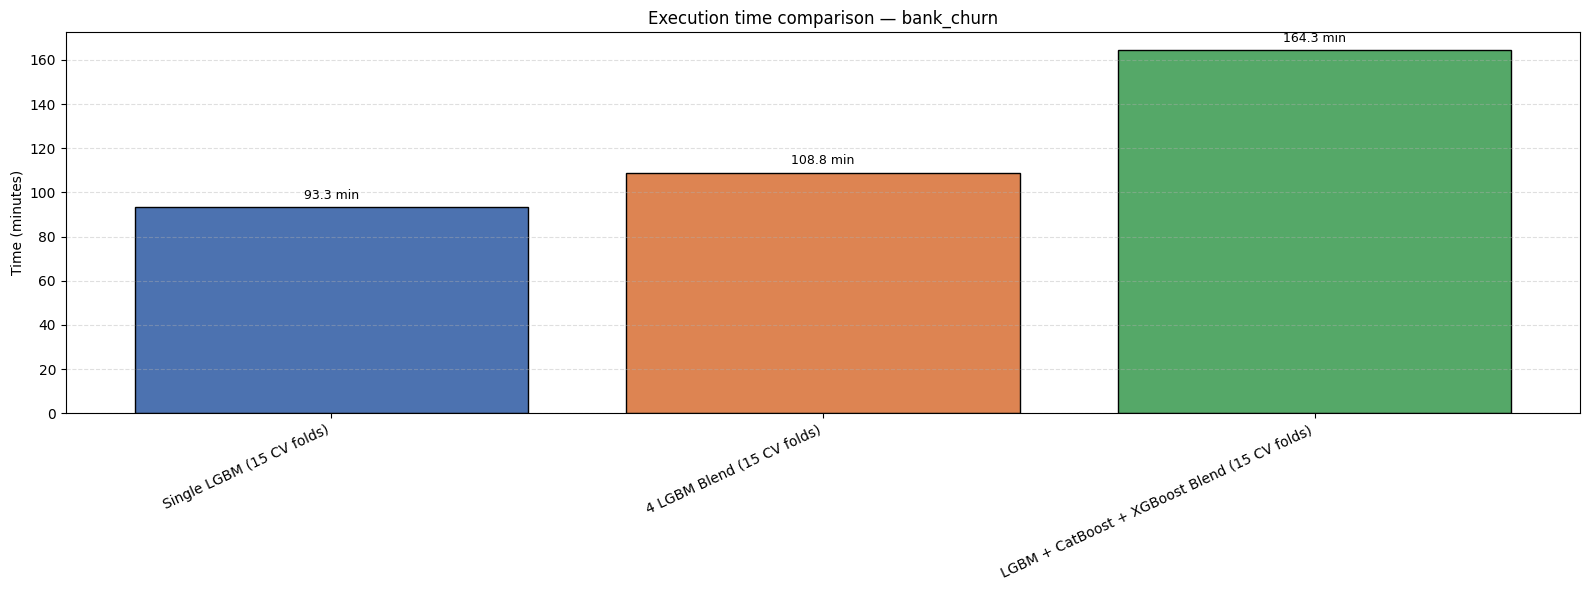



Comparing plots for dataset: failure


## OpenFE failure - objective direction: maximize

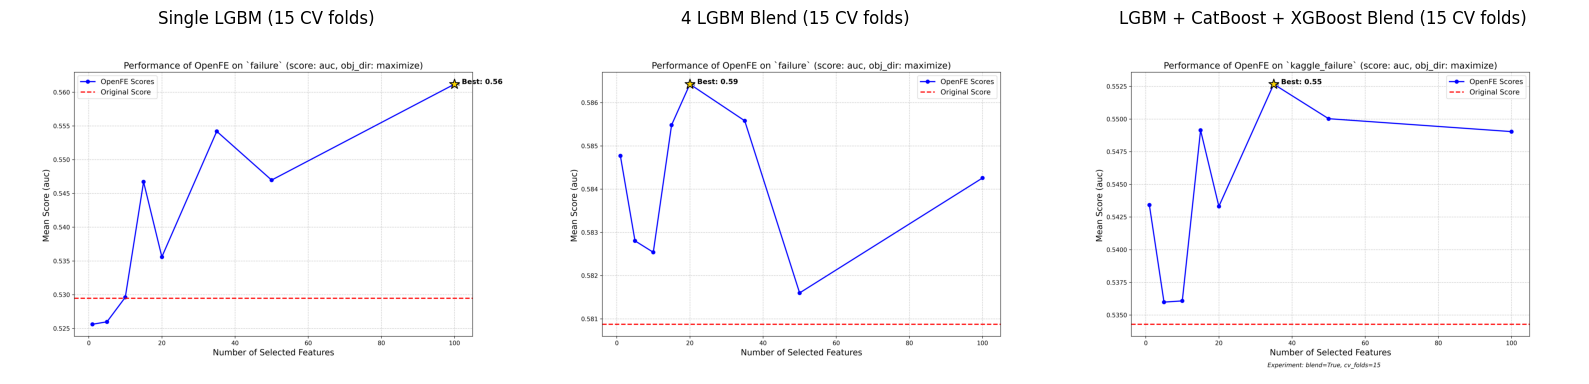

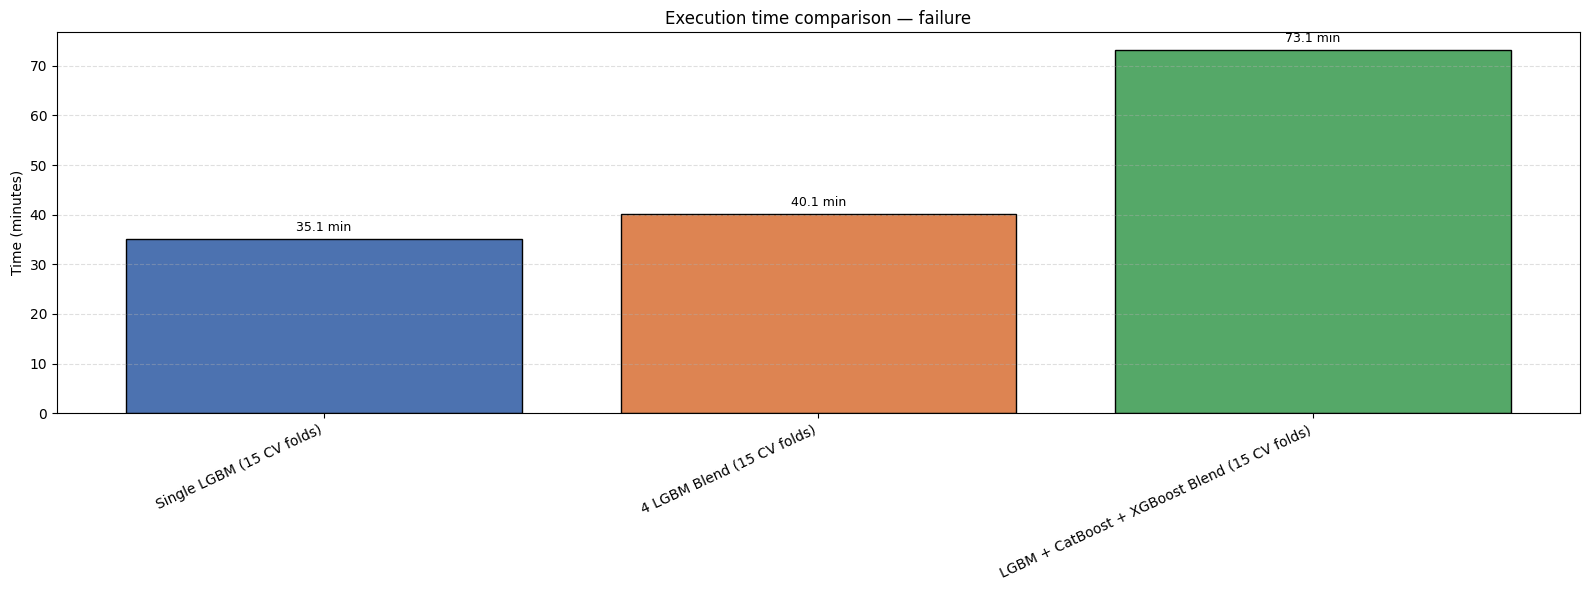



Comparing plots for dataset: unknown_a


## OpenFE unknown_a - objective direction: minimize

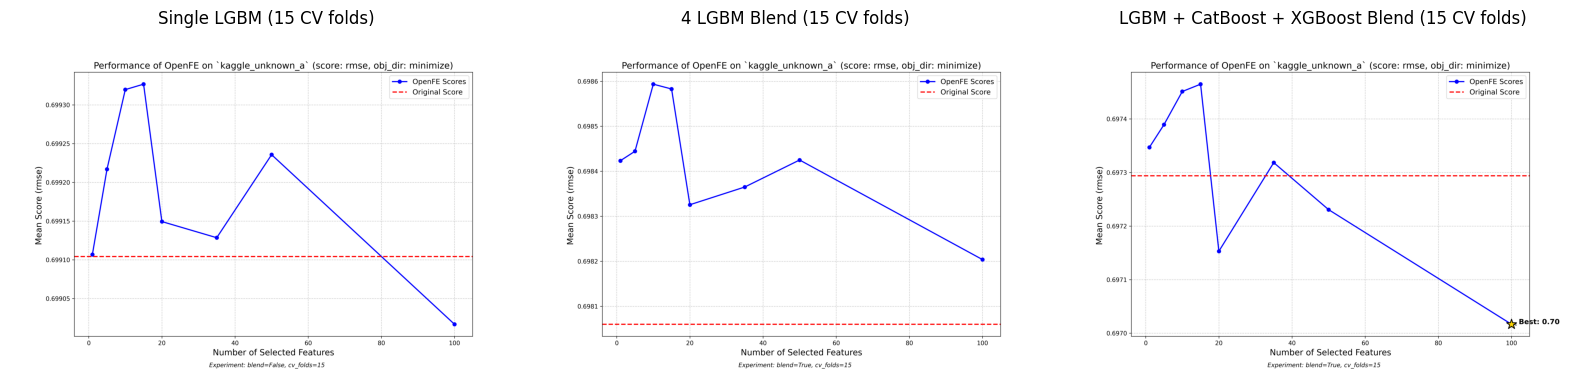

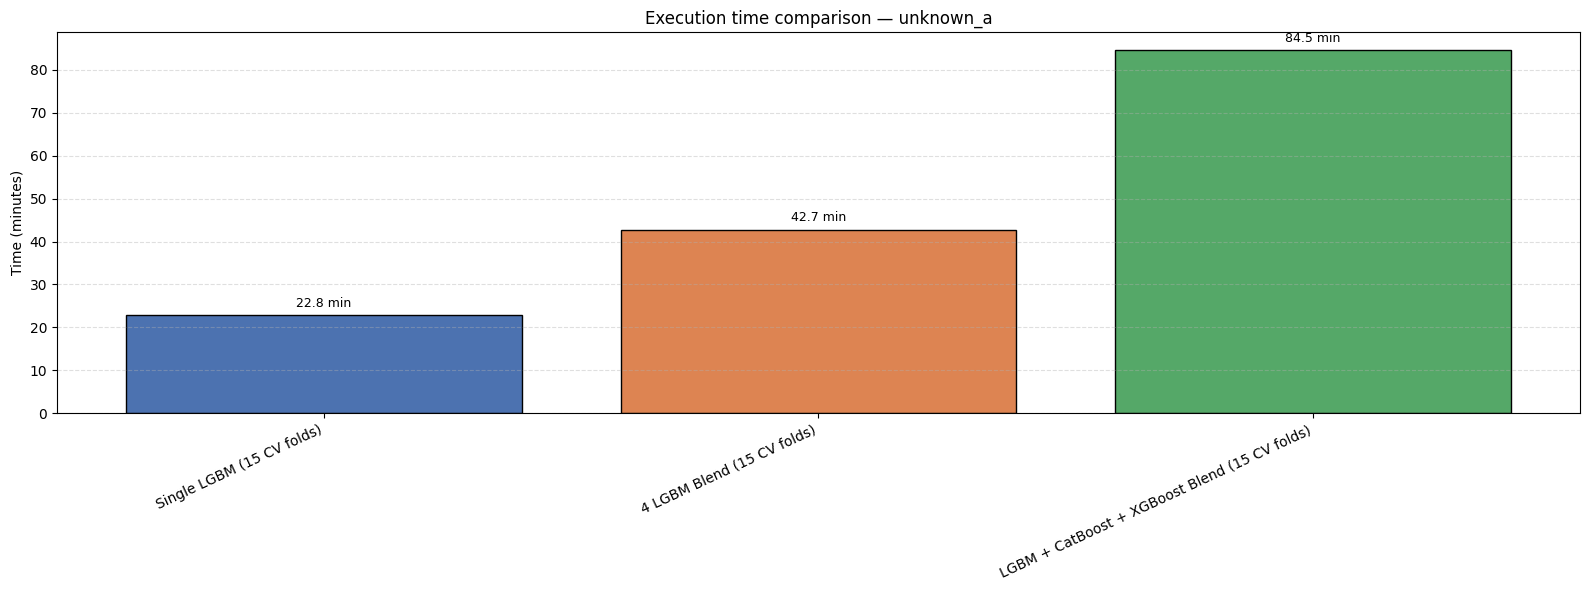

In [5]:
versions_titles = {
    "v4_15_folds": "Single LGBM (15 CV folds)",
    "blend_4_models_v4_15_folds": "4 LGBM Blend (15 CV folds)",
    "blend_lgbm_catboost_xgboost_v4_15_folds": "LGBM + CatBoost + XGBoost Blend (15 CV folds)",
}

versions = list(versions_titles.keys())
titles = list(versions_titles.values())
subplots_dims = (1, 3)  # 2 rows, 2 columns

for data_name in datasets:
    try:
        print(f"\n\nComparing plots for dataset: {data_name}")
        base_path_list = get_base_paths(data_name, versions_list=versions)
        plots_path_list = get_both_plots(path_list=base_path_list)
        metadata_list = get_both_metadata(path_list=base_path_list)
        obj_direction = metadata_list[0]["objective_direction"]
        compare_plots(data_name, obj_direction=obj_direction, plots_path_list=plots_path_list, titles_list=titles, subplots_dims=subplots_dims)
        compare_execution_times(data_name, metadata_list=metadata_list, titles_list=titles)
    except Exception as e:
        print(f"An error occurred while processing {data_name}: {e}")